In [1]:
# Import libaries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp

# Ignore warning messages.
warnings.filterwarnings("ignore") 

# Read data from the csv file and convert it into a dataframe.
df = pd.read_csv('games.csv')

df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [3]:
# Count number of missing values in columns.
df.isna().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [4]:
# Clean the dataset.

# Rename columns to lowercase and convert spaces into underscores.
def clean_column_names(df: pd.DataFrame) -> pd.DataFrame:
    
    new_columns = [col.lower().replace(" ", "_") for col in df.columns]
    df = df.rename(columns=dict(zip(df.columns, new_columns)))

    return df

# Drops the specified columns from a dataframe and returns a new dataframe with the columns removed.
def drop_columns(df: pd.DataFrame, cols_to_drop: list = None, 
                 idx_to_drop: list = None) -> pd.DataFrame:

    new_df = df.copy()

    # Drop the specified columns from the dataframe.
    if cols_to_drop is not None:
        new_df = new_df.drop(columns=cols_to_drop)

    # Drop the specified rows from the dataframe.
    if idx_to_drop is not None:
        new_df = new_df.drop(index=idx_to_drop)

    return new_df


# Convert string numerical values to int.
def convert_str_num_to_int(df: pd.DataFrame, col_names: list) -> pd.DataFrame:
    
    new_df = df.copy()
    
    for col in col_names:
        # Convert the column into int type.
        new_df[col] = new_df[col].replace({'K': '*1e3'}, regex=True).map(pd.eval).astype(int)

    return new_df

In [5]:
# Define columns to drop and use function to remove them.
cols_names = ['Unnamed: 0', 'Team', 'Times Listed', 'Reviews', 'Summary', 'Number of Reviews']
df = drop_columns(df, cols_names)

# Rename and reformat columns. 
df = clean_column_names(df)

# Define columns to convert and use function to process.
numerical_cols = ['plays', 'playing', "backlogs", "wishlist"]
df = convert_str_num_to_int(df, numerical_cols)

# Drop unreleased games from list and convert 'release_date' column to datetime format.
cond = df["release_date"] == "releases on TBD"
df = drop_columns(df, idx_to_drop=df[cond].index)
df["release_date"] = pd.to_datetime(df["release_date"])

df.head()

,title,release_date,rating,genres,plays,playing,backlogs,wishlist
0,Elden Ring,2022-02-25,4.5,"['Adventure', 'RPG']",17000,3800,4600,4800
1,Hades,2019-12-10,4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,4.4,"['Adventure', 'RPG']",30000,2500,5000,2600
3,Undertale,2015-09-15,4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28000,679,4900,1800
4,Hollow Knight,2017-02-24,4.4,"['Adventure', 'Indie', 'Platform']",21000,2400,8300,2300


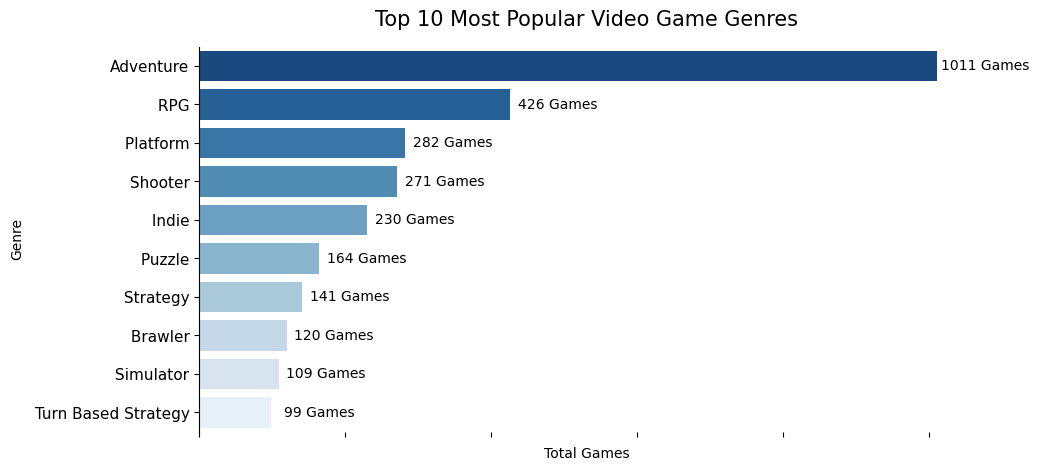

In [6]:
# Create bar graph to see the popular genre.

# Replace '[', ']', and "'" characters in the genres column.
df["genres"] = df["genres"].str.replace('[\[\]\'\"]', "")

# Create a binary matrix of genre values for each game.
genres = df["genres"].str.get_dummies(",")

# Sum the occurrences of each genre across all games.
popularity = genres.sum().sort_values(ascending=False)

# Plot the bar graph.
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=popularity[:10].values, y=popularity[:10].index, palette="Blues_r", ax=ax)

# Add labels.
for i, v in enumerate(popularity[:10].values):
    ax.text(v + 130 / 2, i, str(f"{v} Games"), color="black", ha="center", va="center")

ax.set_title("Top 10 Most Popular Video Game Genres", fontsize=15, pad=15)
ax.set_xlabel("Total Games")
ax.set_ylabel("Genre")

# Graph options.
ax.set_xticklabels([])
ax.tick_params(axis="y", labelsize=11)
sns.despine(right=True, top=True, bottom=True)

plt.show()

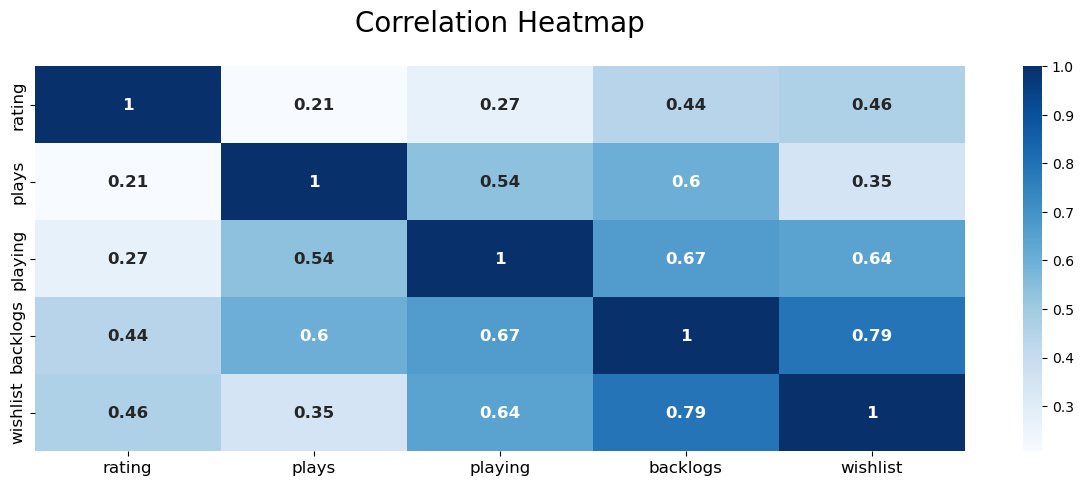

In [7]:
# Generate heatmap.
fig, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(df.corr(), annot = True, cmap="Blues", annot_kws = {'fontsize':12, 'fontweight':'bold'})

# Heatmap options.
ax.set_title("Correlation Heatmap", fontsize=20, pad=25)
ax.tick_params(axis="both", labelsize=12)

plt.show()

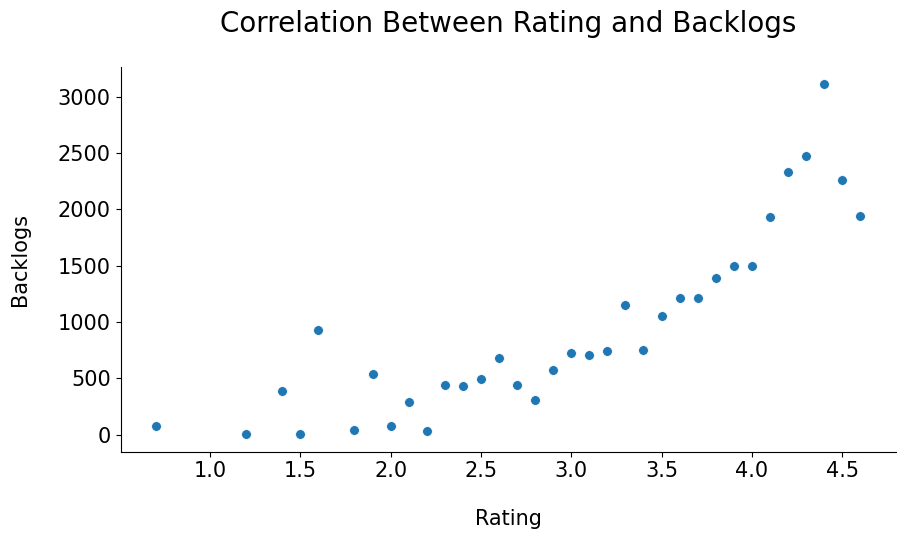

In [8]:
# Create scatter plot to show relationship between 'rating' and 'backlogs' columns.

# Group the data by the 'rating' column and calculating the mean of the 'backlogs' column for each group
rating_backlogs = df.groupby("rating")["backlogs"].mean().reset_index()

rating_backlogs.columns = ["Rating", "Average Backlogs"]

# Plot the scatterplot.
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.scatterplot(data=rating_backlogs, x="Rating", y="Average Backlogs", s=50)
sns.despine(ax=ax, top=True, right=True)

# Plot options.
ax.set_title("Correlation Between Rating and Backlogs", fontsize=20, pad=25)
ax.tick_params(axis="both", labelsize=15)
ax.set_xlabel("Rating", fontsize=15, labelpad=20)
ax.set_ylabel("Backlogs", fontsize=15, labelpad=20)

plt.show();

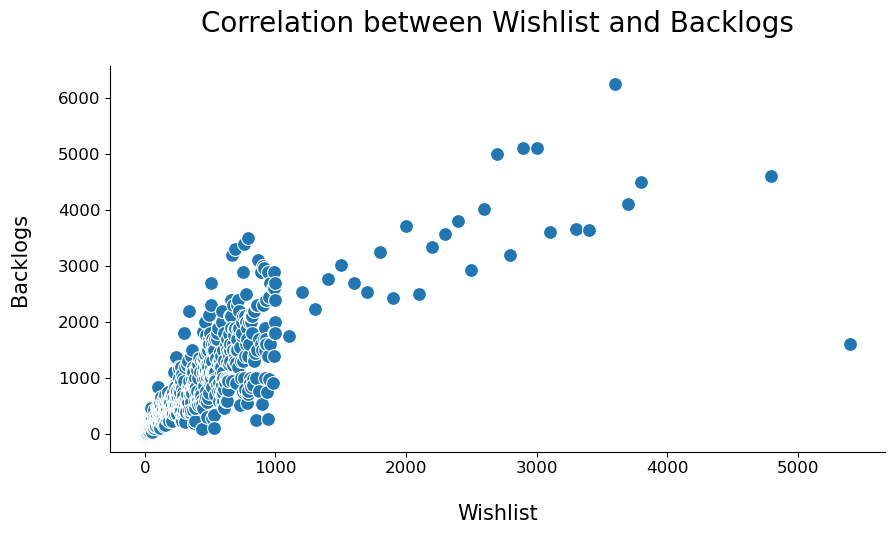

In [11]:
#Let us compare the Wishlist and Backlogs category

#Creating a new dataframe with our two interests
wishlist_backlog = df.groupby("wishlist")["backlogs"].mean().reset_index() #getting the average of Backlogs
wishlist_backlog.columns = ["Wishlist", "Average Backlogs"] #renaming the columns
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# plotting the scatterplot
ax = sns.scatterplot(data=wishlist_backlog, x="Wishlist", y="Average Backlogs", s=100)

# Despine the plot from the right and top
sns.despine(ax=ax, top=True, right=True)

# Add a descriptive title and increase its size and add padding
ax.set_title("Correlation between Wishlist and Backlogs", fontsize=20, pad=25)

# Increase the size of the x-axis and y-axis ticks
ax.tick_params(axis="both", labelsize=12)

# Increase the size of the x-axis and y-axis labels and add paddings
ax.set_xlabel("Wishlist", fontsize=15, labelpad=20)
ax.set_ylabel("Backlogs", fontsize=15, labelpad=20)

# Show the plot
plt.show();

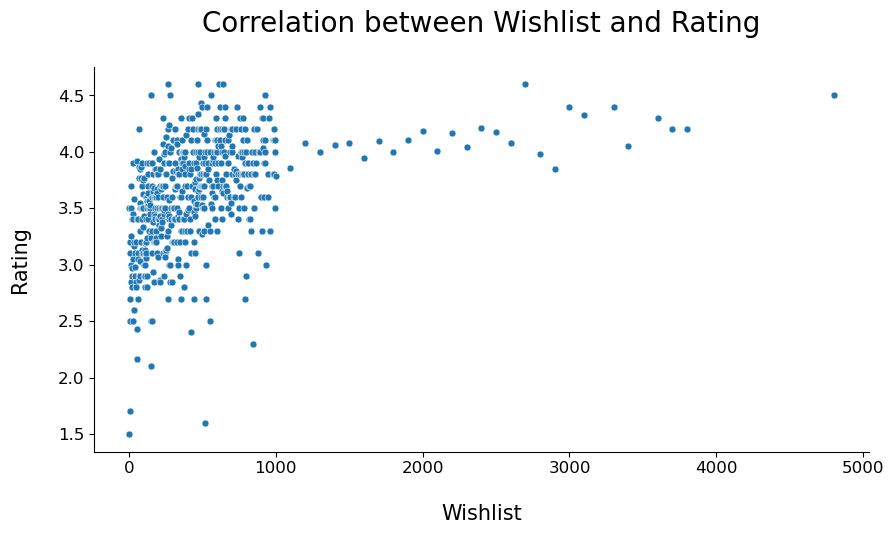

In [13]:
#Let us compare the Wishlist and Ratings category

#Creating a new dataframe with our two interests

wishlist_ratings = df.groupby("wishlist")["rating"].mean().reset_index() #getting the average of Ratings
wishlist_ratings.columns = ["Wishlist", "Average Ratings"]#renaming the columns
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# plotting the scatterplot
ax = sns.scatterplot(data=wishlist_ratings, x="Wishlist", y="Average Ratings", s=25)

# Despine the plot from the right and top
sns.despine(ax=ax, top=True, right=True)

# Add a descriptive title and increase its size and add padding
ax.set_title("Correlation between Wishlist and Rating", fontsize=20, pad=25)

# Increase the size of the x-axis and y-axis ticks
ax.tick_params(axis="both", labelsize=12)

# Increase the size of the x-axis and y-axis labels and add paddings
ax.set_xlabel("Wishlist", fontsize=15, labelpad=20)
ax.set_ylabel("Rating", fontsize=15, labelpad=20)

# Show the plot
plt.show();

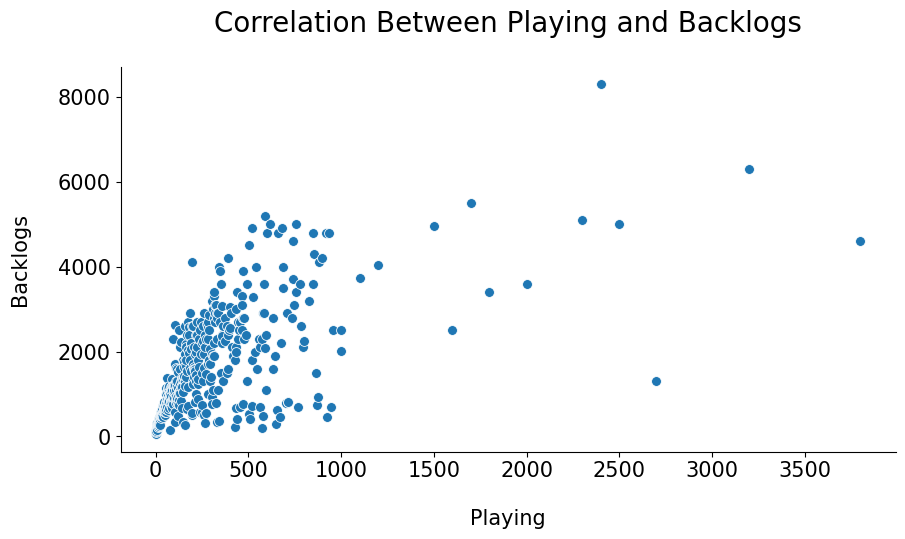

In [14]:
# Create scatter plot to show relationship between 'playing' and 'backlogs' columns.

# Group the data by the 'rating' column and calculating the mean of the 'backlogs' column for each group
rating_backlogs = df.groupby("playing")["backlogs"].mean().reset_index()

rating_backlogs.columns = ["Playing", "Average Backlogs"]

# Plot the scatterplot.
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.scatterplot(data=rating_backlogs, x="Playing", y="Average Backlogs", s=50)
sns.despine(ax=ax, top=True, right=True)

# Plot options.
ax.set_title("Correlation Between Playing and Backlogs", fontsize=20, pad=25)
ax.tick_params(axis="both", labelsize=15)
ax.set_xlabel("Playing", fontsize=15, labelpad=20)
ax.set_ylabel("Backlogs", fontsize=15, labelpad=20)

plt.show();